## Importer les bibliothèques

In [3]:
# Importer les bibliothèques
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

## Importer les données

In [4]:
# Importer jeu de données avec Pandas
datavilles = pd.read_csv('villes.csv', sep = ';')

In [5]:
# Visulaliser les données
datavilles.head()

,ville,janv,fev,mars,avril,mai,juin,juil,aout,sept,oct,nov,dec
0,ajac,7.7,8.7,10.5,12.6,15.9,19.8,22.0,22.2,20.3,16.3,11.8,8.7
1,ange,4.2,4.9,7.9,10.4,13.6,17.0,18.7,18.4,16.1,11.7,7.6,4.9
2,ango,4.6,5.4,8.9,11.3,14.5,17.2,19.5,19.4,16.9,12.5,8.1,5.3
3,besa,1.1,2.2,6.4,9.7,13.6,16.9,18.7,18.3,15.5,10.4,5.7,2.0
4,biar,7.6,8.0,10.8,12.0,14.7,17.8,19.7,19.9,18.5,14.8,10.9,8.2


## Dimension 

In [6]:
datavilles.shape

(32, 13)

## Définitions de X et des labels

In [7]:
X = datavilles.iloc[:,1:13].values
labels = datavilles.iloc[:,0].values
print(labels)

['ajac' 'ange' 'ango' 'besa' 'biar' 'bord' 'bres' 'cler' 'dijo' 'embr'
 'gren' 'lill' 'limo' 'lyon' 'mars' 'mont' 'nanc' 'nant' 'nice' 'nime'
 'orle' 'pari' 'perp' 'reim' 'renn' 'roue' 'stqu' 'stra' 'toul' 'tlse'
 'tour' 'vich']


## ACP

In [8]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [9]:
X = StandardScaler().fit_transform(X)
pca = PCA()
pca.fit(X)
print(pca.components_[:2,:])
sum(pca.explained_variance_ratio_[:2])

[[ 0.27151028  0.28846164  0.3010811   0.30354174  0.28353089  0.27841907
   0.27290295  0.28757774  0.30472022  0.3038548   0.29242808  0.2729549 ]
 [ 0.39933494  0.29907184  0.12943051 -0.11530598 -0.32314291 -0.35846763
  -0.38879639 -0.3010133  -0.11231622  0.12249226  0.26269461  0.38693688]]


0.9898879529268558

## Visualisation

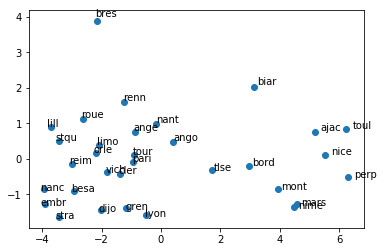

In [10]:
X_pca = pca.fit_transform(X)
plt.scatter(X_pca[:,0], X_pca[:,1])
for label,x,y in zip(labels,X_pca[:,0], X_pca[:,1]):
    plt.annotate(label,xy=(x,y), textcoords='offset points')

## Clustering par KMeans

In [11]:
from sklearn.cluster import KMeans
import matplotlib.colors as col

In [12]:
X = datavilles.iloc[:,1:13].values
labels = datavilles.iloc[:,0].values
labels
km = KMeans(n_clusters=3).fit(X)
y_pred = km.predict(X)
print(y_pred)

[1 2 2 0 1 1 2 0 0 0 0 0 0 0 1 1 0 2 1 1 0 2 1 0 2 0 0 0 1 2 2 0]


## Visualisation

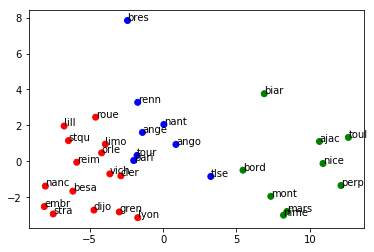

In [13]:
X_pca = pca.fit_transform(X)
colors =['red', 'green', 'blue']
plt.scatter(X_pca[:,0], X_pca[:,1], c=y_pred, cmap=col.ListedColormap(colors))
for label,x,y in zip(labels, X_pca[:,0], X_pca[:,1]):
    plt.annotate(label,xy=(x,y))
plt.show()

## Choix du nombre de clusters pour K-means

In [14]:
from sklearn import metrics
for i in range(2,7):
    y_pred = KMeans(n_clusters=i).fit_predict(X)
    print('L indice de silhouette pour {0:d} clusters est {1: f}'.format(i,metrics.silhouette_score(X,y_pred,metric='euclidean')))

L indice de silhouette pour 2 clusters est  0.618116
L indice de silhouette pour 3 clusters est  0.409120
L indice de silhouette pour 4 clusters est  0.340054
L indice de silhouette pour 5 clusters est  0.319575
L indice de silhouette pour 6 clusters est  0.336973


## Visulalisation et clustering par Regroupement Hiérarchique

In [16]:
from sklearn.cluster import AgglomerativeClustering

X = datavilles.iloc[:,1:13].values
labels = datavilles.iloc[:,0].values
X_pca = pca.fit_transform(X)
labels
hc = AgglomerativeClustering(n_clusters=3).fit(X_pca)
y_pred = hc.fit_predict(X_pca)
print(y_pred)

[0 2 2 1 0 0 2 1 1 1 1 1 1 1 0 0 1 2 0 0 1 1 0 1 2 1 1 1 0 0 1 1]


In [19]:
y_hc = hc.fit_predict(X)

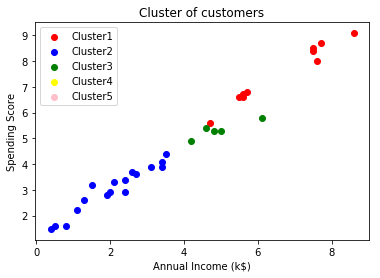

In [20]:
plt.scatter(X[y_hc == 0,0], X[y_hc == 0,1], c = 'red', label = 'Cluster1')
plt.scatter(X[y_hc == 1,0], X[y_hc == 1,1], c = 'blue', label = 'Cluster2')
plt.scatter(X[y_hc == 2,0], X[y_hc == 2,1], c = 'green', label = 'Cluster3')
plt.scatter(X[y_hc == 3,0], X[y_hc == 3,1], c = 'yellow', label = 'Cluster4')
plt.scatter(X[y_hc == 4,0], X[y_hc == 4,1], c = 'pink', label = 'Cluster5')
plt.title('Cluster of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score')
plt.legend()
plt.show()